# Paper

#### Import Functions

In [2]:
%matplotlib inline

#import pyvttbl as pt
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
import statsmodels.api as sm

import statsmodels.formula.api as smf

import numpy as np
import sklearn
import pandas as pd
#import preprocess2
#import prepare
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from scipy import stats
import warnings
from scipy.stats.mstats import zscore
import matplotlib
#matplotlib.use('TkAgg')  
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as hac
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import cross_val_score
import mne
import imageio
import datetime as dt
import os 


#### Loading the Data

In [3]:
df=pd.read_csv('./final_df_mb.csv', sep=',', na_values=['?']) 

## Participants (Demographics and Sample Characteristics)

In [4]:
df=df[df.vpn!=26] # hier ist irgendetwas schief gegangen - die Zeiten stimmen nicht!! 
df=df[df.vpn!=33] # hier ist irgendetwas schief gegangen - die Zeiten stimmen nicht!! 
#df=df[df.vpn!=34] # extrem unruhig
df=df[df.vpn!=37] # extrem unruhig
df=df[df.conversation!='base'].reset_index() #delete the trigger and base

In [5]:
df['ZYG_z']=scipy.stats.zscore(df['ZYG'])
df['COR_z']=scipy.stats.zscore(df['COR'])
df['LEV_z']=scipy.stats.zscore(df['LEV'])

In [6]:
print ('number of particpants ' + str(len(df.groupby('vpn'))))
#print 'number of females ' + str(len(df[df.gender==1].groupby('vpn')))
print ('min age ' + str(np.min(df.groupby('vpn').mean().years)))
print ('max age ' + str(np.max(df.groupby('vpn').mean().years)))
print ('mean age ' + str(np.mean(df.groupby('vpn').mean().years)))
print ('std age ' + str(np.std(df.groupby('vpn').mean().years)))
print ('AQ above cut-off of 17: ' + str(np.sum(df.groupby('vpn').mean().AQsum>17)))
print ('mean AQ' + str(np.mean(df.groupby('vpn').mean().AQsum)))
print ('mean AQ' + str(np.std(df.groupby('vpn').mean().AQsum)))
print ('mind. high-school education: ' + str(np.sum(df.groupby('vpn').mean().education>5)))
print ('WST: ' + str(np.sum(df.groupby('vpn').mean().WST<20)))

number of particpants 36
min age 18.0
max age 34.0
mean age 25.86111111111111
std age 4.744311083215453
AQ above cut-off of 17: 5
mean AQ9.583333333333334
mean AQ5.969249906348739
mind. high-school education: 27
WST: 0


## EMG Activity over Timecourse of Conversation

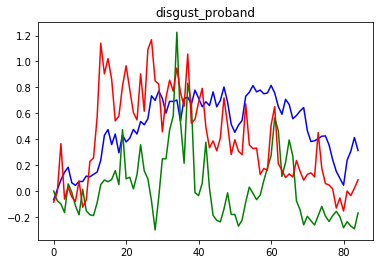

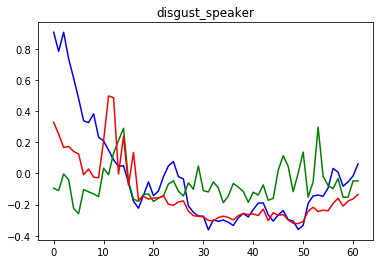

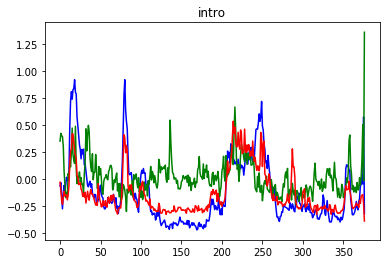

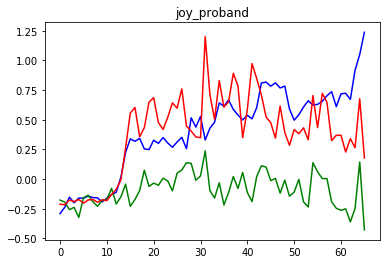

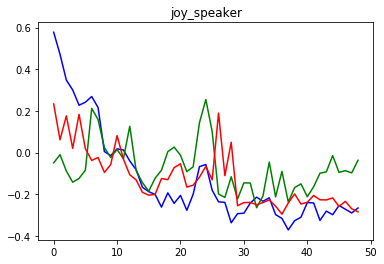

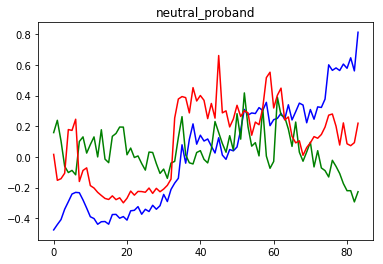

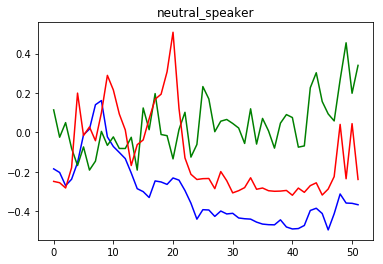

In [7]:
colors=['blue', 'green','red']
#final=df[(df.vpn==34)]# | (df.vpn!=33)]
final=df
muscles=['ZYG_z', 'COR_z', 'LEV_z']

for conv in np.unique(final.conversation):
    i=0
    for m in muscles:
        plt.plot(np.array(final[(final['conversation']==conv)].groupby(['counter']).mean().reset_index()['counter']), 
                 np.array(final[(final['conversation']==conv)].groupby(['counter']).mean().reset_index(drop=True)[m]),
                 color=colors[i])
        plt.title(str(conv))
        #plt.ylim(0, 200)
        i=i+1
    plt.show()

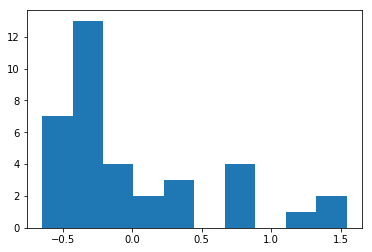

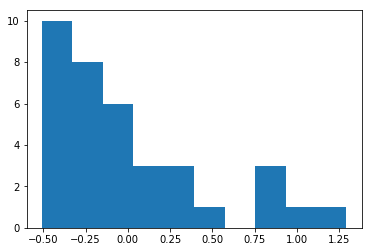

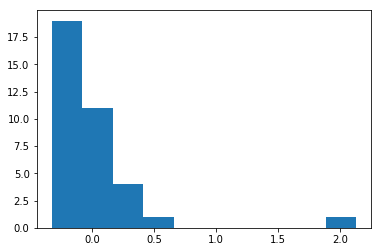

In [8]:
plt.hist(df.groupby('vpn').mean()['ZYG_z'])
plt.show()
plt.hist(df.groupby('vpn').mean()['COR_z'])
plt.show()
plt.hist(df.groupby('vpn').mean()['LEV_z'])
plt.show()

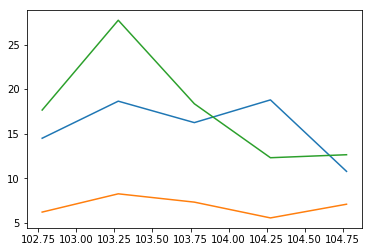

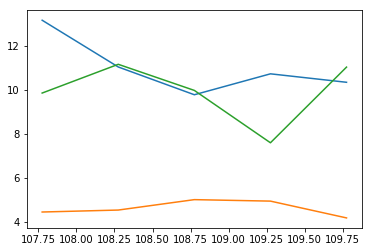

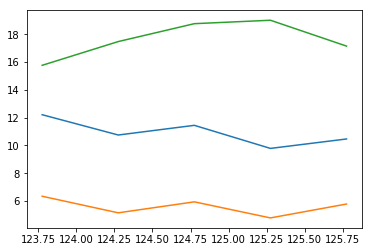

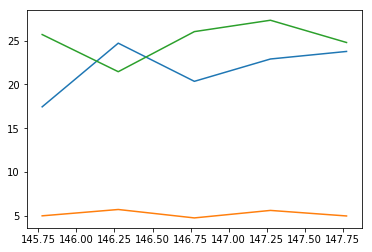

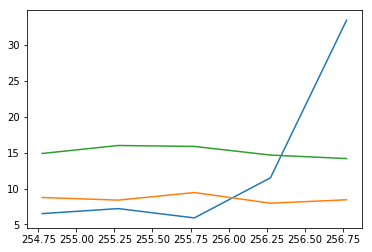

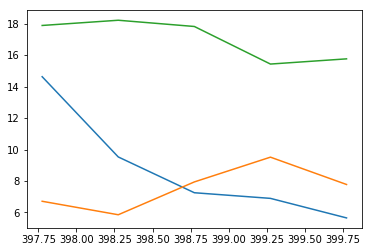

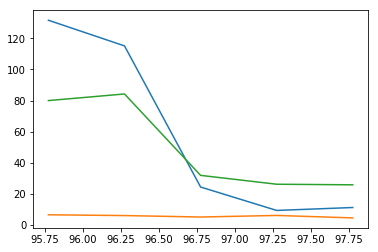

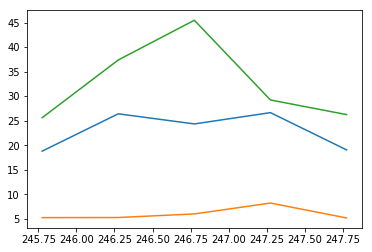

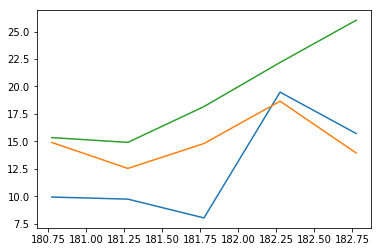

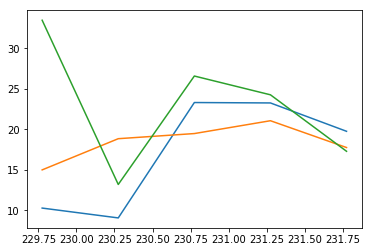

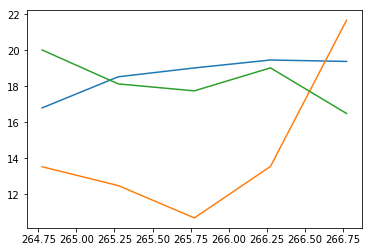

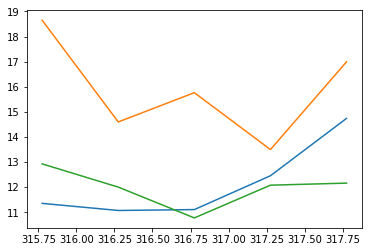

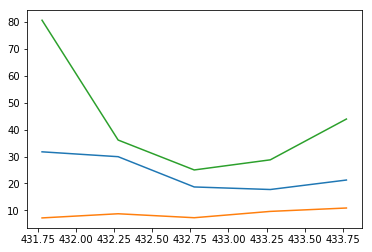

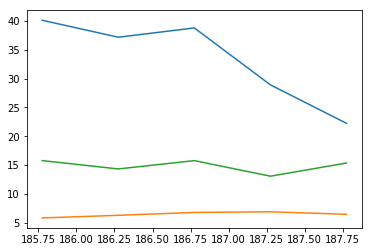

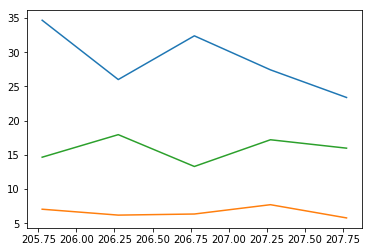

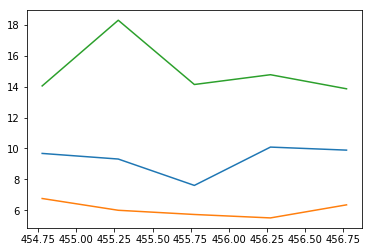

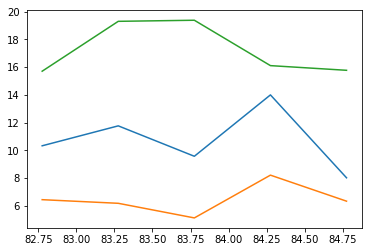

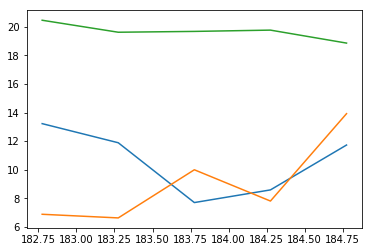

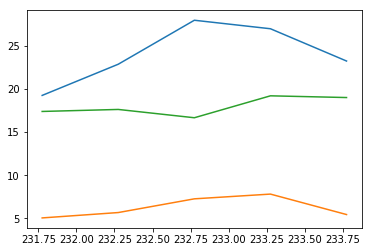

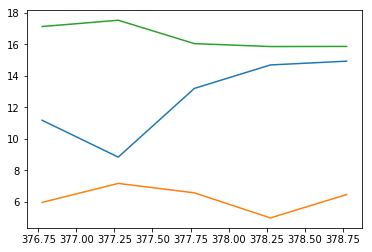

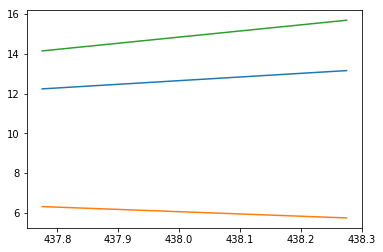

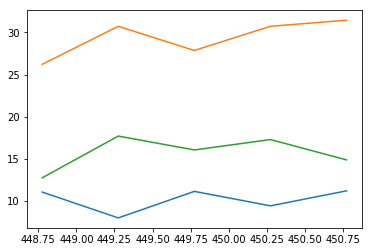

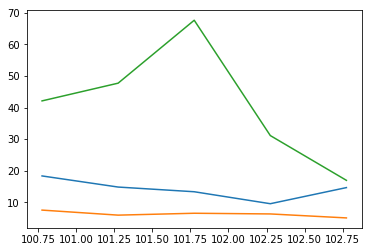

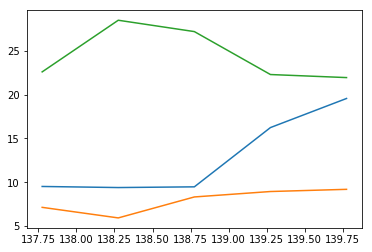

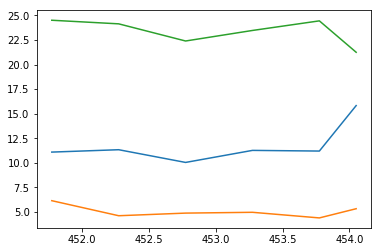

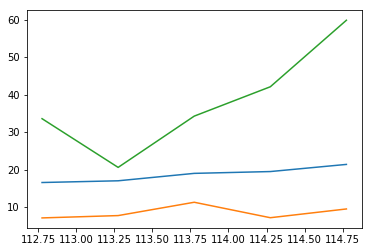

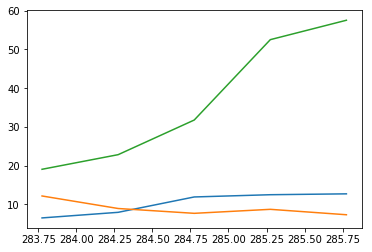

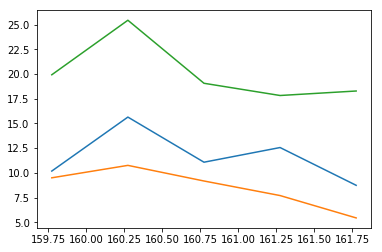

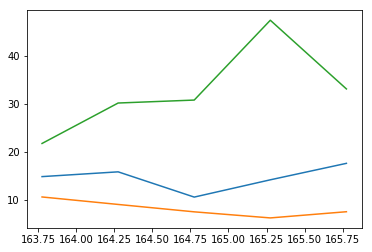

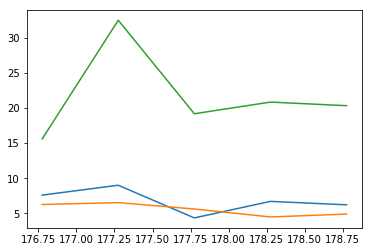

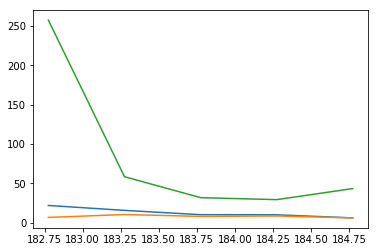

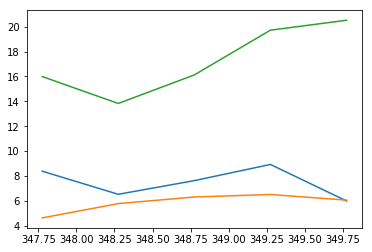

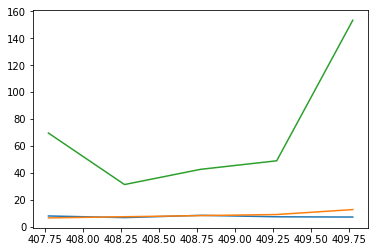

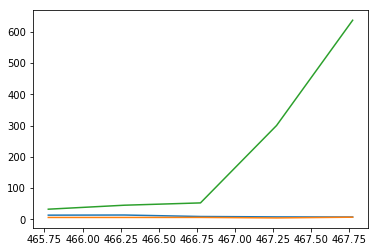

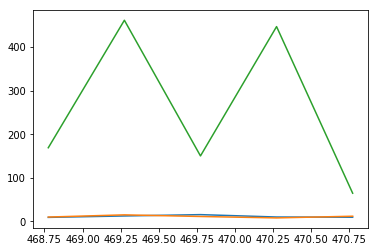

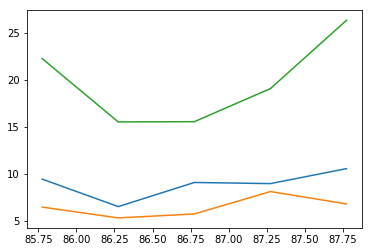

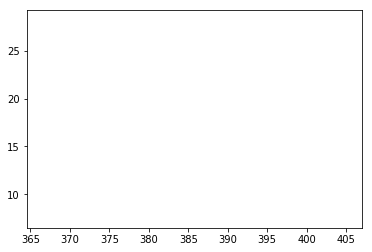

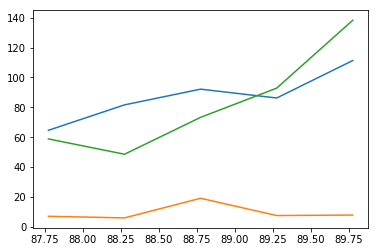

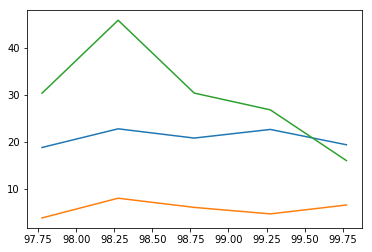

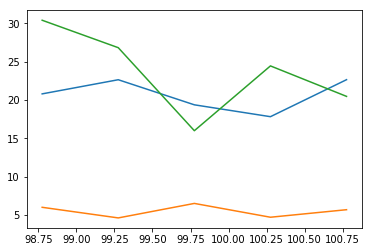

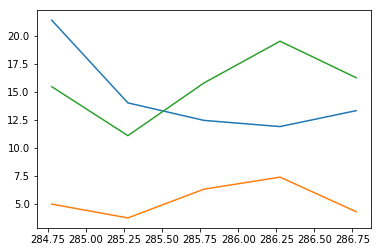

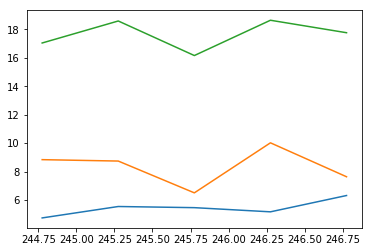

In [9]:
af=pd.read_csv('./mb/artefacts.csv', sep=',', na_values=['?']) 

#participant=2
df['timestamp_in_sec']=df.timestamp/20

def check_an_artefact(df, participant, giventime):
    df=df[df.vpn==participant]
    try:
        moment=np.float(df[(pd.to_datetime(df['time']).dt.time==giventime)]['timestamp'])
        #print df.loc[(df.timestamp<moment+200) &(df.timestamp>moment)][['ZYG', 'COR', 'LEV', 'time', 'timestamp']]# & (df.timestamp<moment+10)]
        plt.plot(df.loc[(df.timestamp<moment+60) &(df.timestamp>moment)][['timestamp_in_sec']],
                 df.loc[(df.timestamp<moment+60) &(df.timestamp>moment)][['ZYG', 'COR', 'LEV']])
        plt.show()
    except:
        print ('')
        
for vpn in set(af.vpn):
    artefakte=af[af.vpn==vpn]['Artefacts'].reset_index(drop=True)
    for a in artefakte:
        giventime=pd.to_datetime(a).time()
        check_an_artefact(df, vpn, giventime)


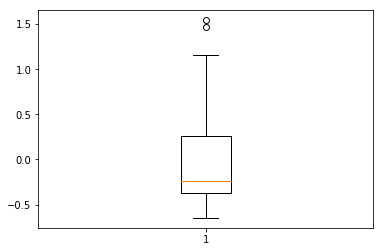

0    17
1    23
Name: vpn, dtype: int64


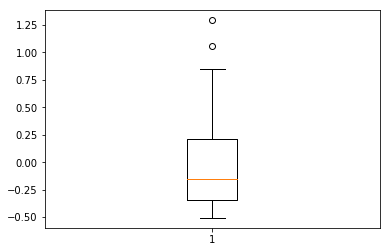

0    3
1    7
Name: vpn, dtype: int64


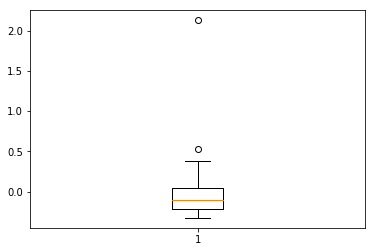

0    10
1    34
Name: vpn, dtype: int64


In [10]:
plt.boxplot(df.groupby('vpn').mean()['ZYG_z'])
plt.show()
print (df.groupby('vpn').mean()[(df.groupby('vpn').mean()['ZYG']>(50))].reset_index().vpn)
plt.boxplot(df.groupby('vpn').mean()['COR_z'])
plt.show()
print (df.groupby('vpn').mean()[(df.groupby('vpn').mean()['COR']>14)].reset_index().vpn)
plt.boxplot(df.groupby('vpn').mean()['LEV_z'])
plt.show()
print (df.groupby('vpn').mean()[(df.groupby('vpn').mean()['LEV']>40)].reset_index().vpn)

In [11]:
df['participant_speaks']=(df.conversation=='joy_proband') | (df.conversation=='disgust_proband') | (df.conversation=='neutral_proband')#if conversation==

df_figure=df.rename(columns={'ZYG_z': 'ZYG (zstd.)', 'COR_z': 'COR (zstd.)', 'LEV_z': 'LEV (zstd.)'})
di = {"neutral_speaker":"1.Table Setting",
      "joy_speaker":"2.Liked Food",
      "disgust_speaker":"3.Disliked Food"}


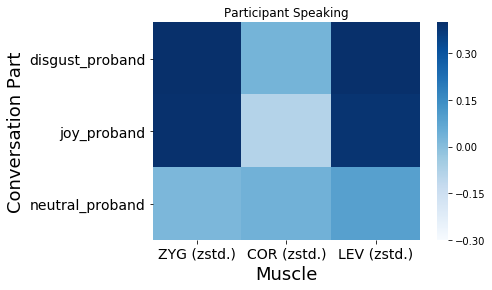

                 ZYG (zstd.)  COR (zstd.)  LEV (zstd.)
conversation                                          
disgust_proband     0.483920     0.033303     0.399426
joy_proband         0.395543    -0.084848     0.386718
neutral_proband     0.020337     0.039881     0.092932


In [30]:
g=sns.heatmap(df_figure[df_figure.participant_speaks==True].groupby('conversation').mean()[['ZYG (zstd.)', 'COR (zstd.)',  'LEV (zstd.)']], 
                 cmap='Blues',  vmin=-0.3, vmax=0.4)#cmap='Blues')

#plt.set
plt.xticks(fontsize=14) 
plt.yticks(fontsize=14) 
plt.xlabel('Muscle', fontsize=18) 
plt.ylabel('Conversation Part', fontsize=18)
plt.title('Participant Speaking')
plt.savefig('Muscles_Speaking_' + '_.png')
plt.show()

print (df_figure[df_figure.participant_speaks==True].groupby('conversation').mean()[['ZYG (zstd.)', 'COR (zstd.)', 'LEV (zstd.)']])



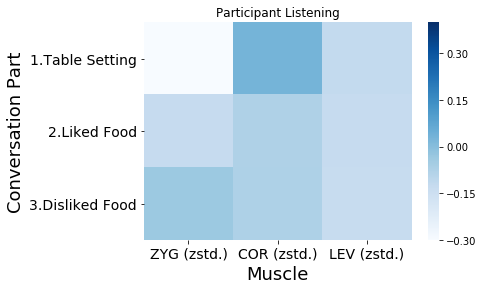

                 ZYG (zstd.)  COR (zstd.)  LEV (zstd.)
conversation                                          
1.Table Setting    -0.306272     0.032755    -0.118944
2.Liked Food       -0.123894    -0.073889    -0.123023
3.Disliked Food    -0.034146    -0.070567    -0.128677


In [31]:
g=sns.heatmap(df_figure[(df_figure.participant_speaks==False) &(df.conversation!='intro')].groupby('conversation').mean()[['ZYG (zstd.)', 'COR (zstd.)', 'LEV (zstd.)']], 
              cmap='Blues',  vmin=-0.3, vmax=0.4)
#cmap='RdBu_r',

#print (df[df.participant_speaks==True].groupby('conversation').mean()[['ZYG_z', 'COR_z']])

#plt.set
plt.xticks(fontsize=14) 
plt.yticks(fontsize=14) 
plt.xlabel('Muscle', fontsize=18) 
plt.ylabel('Conversation Part', fontsize=18)
plt.title('Participant Listening')
plt.savefig('Muscles_Listening_' + '_.png')
plt.show()


print (df_figure[(df_figure.participant_speaks==False) &(df_figure.conversation!='intro')].groupby('conversation').mean()[['ZYG (zstd.)', 'COR (zstd.)', 'LEV (zstd.)']])


## Correlation of EMG and Questionnaire Values

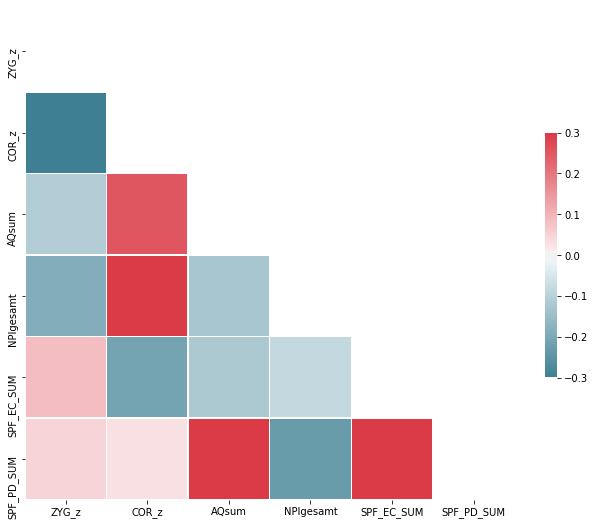

In [14]:
d=df[df.participant_speaks==False][['ZYG_z', 'COR_z',# 'PANAS01neg', 
         'AQsum', 'NPIgesamt', 'SPF_EC_SUM', 'SPF_PD_SUM', 'vpn']].groupby('vpn').mean().reset_index(drop=True)

corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

(-0.2174702606632432, 0.20263320475909288)

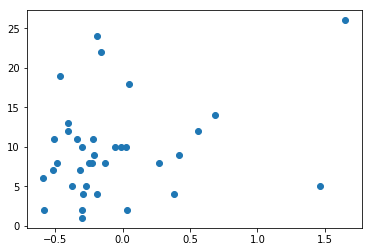

In [15]:
plt.scatter(df[df.conversation=='disgust_speaker'].groupby('vpn').mean()['COR_z'],
            df[df.conversation=='disgust_speaker'].groupby('vpn').mean()['AQsum'])
#plt.show()

scipy.stats.pearsonr(df[df.participant_speaks==True].groupby('vpn').mean()['ZYG_z'],
            df[df.participant_speaks==True].groupby('vpn').mean()['AQsum'])

In [16]:
emotion=2
muscle=2

pos_cor=df[df.conversation=='joy_speaker'].groupby('vpn').mean()['COR_z']
         
pos_zyg=df[df.conversation=='joy_speaker'].groupby('vpn').mean()['ZYG_z']
         
neg_cor=df[df.conversation=='disgust_speaker'].groupby('vpn').mean()['COR_z']
         
neg_zyg=df[df.conversation=='disgust_speaker'].groupby('vpn').mean()['ZYG_z']

print ('Effect of Muscle and Emotion')
data=np.array(pd.concat([pos_cor, pos_zyg, neg_cor, neg_zyg], axis=1))
factorlevels=[emotion, muscle]

print (mne.stats.f_mway_rm(data, factorlevels, effects='A*B'))

Effect of Muscle and Emotion
[array([0.82494102, 0.00266337, 0.88726228]), array([0.36995128, 0.95913462, 0.35267686])]


In [17]:
data=df[df.participant_speaks==True].groupby(['conversation', 'vpn']).mean().reset_index()

model = sm.MixedLM.from_formula("ZYG_z ~ AQsum", data, groups=data['vpn'])
mdf = model.fit()
print(mdf.summary())


model = sm.MixedLM.from_formula("COR_z ~ AQsum", data, groups=data['vpn'])
mdf = model.fit()
print(mdf.summary())


         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: ZYG_z    
No. Observations: 108     Method:             REML     
No. Groups:       36      Scale:              0.1678   
Min. group size:  3       Likelihood:         -108.2479
Max. group size:  3       Converged:          Yes      
Mean group size:  3.0                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     0.618    0.288  2.144 0.032  0.053  1.183
AQsum        -0.033    0.026 -1.299 0.194 -0.083  0.017
Group Var     0.780    0.601                           

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: COR_z   
No. Observations: 108     Method:             REML    
No. Groups:       36      Scale:              0.0886  
Min. group size:  3       Likelihood:         -58.0249
Max. group siz

In [34]:

zyg=df[df.participant_speaks==True].groupby(['conversation', 'vpn']).mean()[['ZYG_z', 'AQsum']].reset_index()
zyg['muscle']='ZYG'
zyg['activity']=zyg.ZYG_z
cor=df[df.participant_speaks==True].groupby(['conversation', 'vpn']).mean()[['COR_z', 'AQsum']].reset_index()
cor['muscle']='COR'
cor['activity']=cor.COR_z
data=pd.concat([zyg, cor]) #, sort=True)

model = sm.MixedLM.from_formula("activity ~ AQsum*muscle ", data, groups=data['vpn'])
mdf = model.fit()
print(mdf.summary())


C:\Users\User\Anaconda2\envs\py3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


            Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   activity 
No. Observations:    216       Method:               REML     
No. Groups:          36        Scale:                0.4232   
Min. group size:     6         Likelihood:           -242.2055
Max. group size:     6         Converged:            Yes      
Mean group size:     6.0                                      
--------------------------------------------------------------
                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept           -0.234    0.171 -1.371 0.171 -0.569  0.101
muscle[T.ZYG]        0.852    0.167  5.091 0.000  0.524  1.181
AQsum                0.024    0.015  1.588 0.112 -0.006  0.054
AQsum:muscle[T.ZYG] -0.057    0.015 -3.858 0.000 -0.086 -0.028
Group Var            0.153    0.091                           



In [27]:
zyg=df[df.participant_speaks==True].groupby(['vpn']).mean()[['ZYG_z', 'AQsum']].reset_index()
zyg['muscle']='ZYG'
zyg['activity']=zyg.ZYG_z
cor=df[df.participant_speaks==True].groupby(['vpn']).mean()[['COR_z', 'AQsum']].reset_index()
cor['muscle']='COR'
cor['activity']=cor.COR_z
data=pd.concat([zyg, cor], sort=True)

model = sm.MixedLM.from_formula("activity ~ AQsum*muscle ", data[data.AQsum>0], groups=data['vpn'])
mdf = model.fit()
print(mdf.summary())

            Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   activity
No. Observations:     72        Method:               REML    
No. Groups:           36        Scale:                0.5037  
Min. group size:      2         Likelihood:           -83.9125
Max. group size:      2         Converged:            Yes     
Mean group size:      2.0                                     
--------------------------------------------------------------
                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept           -0.234    0.224 -1.044 0.296 -0.672  0.205
muscle[T.ZYG]        0.844    0.316  2.668 0.008  0.224  1.464
AQsum                0.025    0.020  1.245 0.213 -0.014  0.064
AQsum:muscle[T.ZYG] -0.058    0.028 -2.062 0.039 -0.113 -0.003
Group Var            0.000    0.140                           



C:\Users\User\Anaconda2\envs\py3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2045: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [32]:
data.head()

,AQsum,COR_z,ZYG_z,activity,muscle,vpn
0,4.0,NaN,2.753054,2.753054,ZYG,1
1,6.0,NaN,1.135821,1.135821,ZYG,2
2,14.0,NaN,-0.374127,-0.374127,ZYG,3
3,7.0,NaN,0.466433,0.466433,ZYG,4
4,10.0,NaN,-0.538674,-0.538674,ZYG,5


## Correlation of Food Preferences and EMG actvity

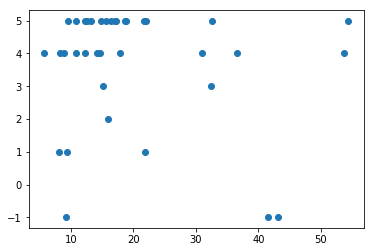

SpearmanrResult(correlation=0.05985180025806496, pvalue=0.7287804559396529)


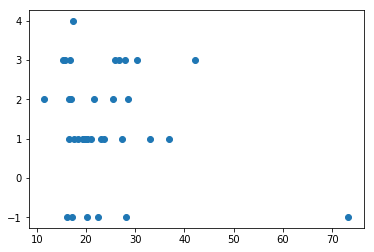

SpearmanrResult(correlation=0.06523149549985807, pvalue=0.7054460589324052)


In [21]:
plt.scatter(df[df.conversation=='joy_speaker'].groupby('vpn').mean()['ZYG'],
            df[df.conversation=='joy_speaker'].groupby('vpn').mean()['pizza'])
plt.show()

print (scipy.stats.spearmanr(final[final.conversation=='joy_speaker'].groupby('vpn').mean()['ZYG'],
            df[df.conversation=='joy_speaker'].groupby('vpn').mean()['pizza']))

plt.scatter(df[df.conversation=='disgust_speaker'].groupby('vpn').mean()['LEV'],
            df[df.conversation=='disgust_speaker'].groupby('vpn').mean()['hering'])
plt.show()

print (scipy.stats.spearmanr(df[df.conversation=='joy_speaker'].groupby('vpn').mean()['LEV'],
            df[df.conversation=='joy_speaker'].groupby('vpn').mean()['hering']))
plt.show()